In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

# Experiment 1

Time evolution of the concentration in C for different values of D

In [152]:
data = pd.read_csv("./experiment1.csv", sep="\t") 
data.tail()

,nb_step,D=1.0,D=0.31622776601683794,D=0.1,D=0.03162277660168379,D=0.01,D=0.0031622776601683794
9995,9995,0.409167,0.398611,0.406667,0.384444,0.295278,0.178889
9996,9996,0.408333,0.398611,0.406944,0.385000,0.295556,0.179167
9997,9997,0.408333,0.398056,0.406667,0.385556,0.295000,0.178889
9998,9998,0.408333,0.398611,0.406667,0.383889,0.295000,0.178889
9999,9999,0.408611,0.398611,0.406389,0.383611,0.295000,0.178889


Expected concetration of $C$ at equilibrium verifies:
$p_{on} [A_{eq}] [B_{eq}] - p_{off} [C_{eq}] = 0$

Supposing $[B_{eq}] = [B_0]$ because it is largely in excess, we get:

$p_{on} ([A_0] - [C_{eq}]) [B_0] - p_{off} [C_{eq}] = 0$, so, we have:

$[C_{eq}] = \frac{p_{on} [A_0] [B_0] }{ p_{off} +  [B_0] p_{on}}$

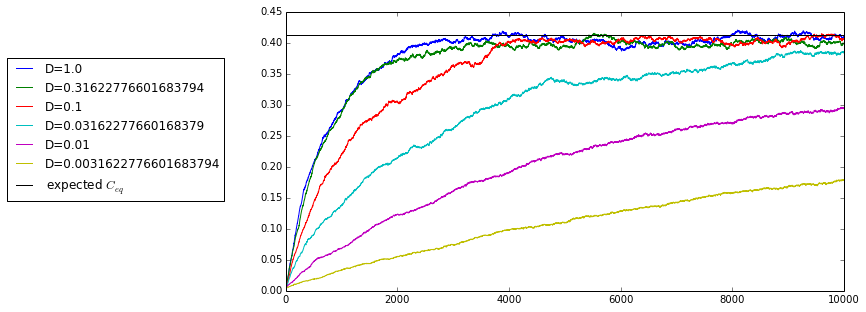

In [153]:
plt.figure(figsize=(10,5))
for c in data :
    if c != "nb_step" : 
        l, = plt.plot(data["nb_step"], data[c], label=c)        

na = 100 * 36
nb = 4500 * 36 
w = 800 * 6

a0 = na / w**2
b0 = nb / w**2
pon = 0.1
poff = 0.001
c_eq = pon * a0 * b0 /(poff + b0 * pon) 
nc_eq = c_eq * w** 2 
plt.plot([0,10000],[nc_eq/na, nc_eq/na], label='expected $C_{eq}$')
plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)
plt.show()

# Experiment 2

Time evolution of the concentration in C for several values of the concentration in obstacles $\rho$

In [156]:
data = pd.read_csv("./experiment2.csv", sep="\t") 
data.tail()

,nb_step,ro=0.0,ro=0.05,ro=0.1,ro=0.15000000000000002,ro=0.2,ro=0.25,ro=0.30000000000000004,ro=0.35000000000000003
9995,9995,0.417222,0.423611,0.428056,0.440278,0.460556,0.467778,0.483333,0.488333
9996,9996,0.417500,0.423889,0.428056,0.439722,0.459722,0.468056,0.483056,0.486944
9997,9997,0.417500,0.424722,0.427778,0.439722,0.460278,0.467500,0.482500,0.486389
9998,9998,0.417222,0.425000,0.427222,0.440000,0.459444,0.467222,0.481667,0.486944
9999,9999,0.416944,0.425833,0.427222,0.439167,0.460000,0.467222,0.481667,0.487222


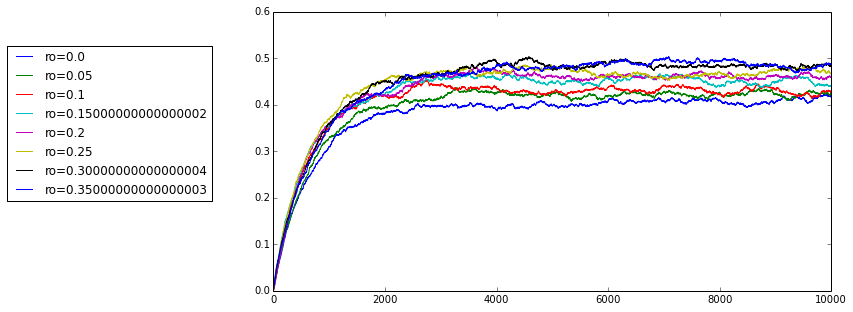

In [157]:
na = 100 * 36
nb = 4500 * 36 
w = 800 * 6

pon = 0.1
poff = 0.001

plt.figure(figsize=(10,5))
#i = 0 ;
for c in data :
    if c != "nb_step" : 
        l, = plt.plot(data["nb_step"], data[c], label=c)
        #ro = i *0.05
        #S = w**2 * (1-ro)
        #a0 = na / S
        #b0 = nb / S
        #c_eq = pon * a0 * b0 /(poff + b0 * pon) 
        #nc_eq = c_eq * S 
        #plt.plot([4000,10000],[nc_eq/na, nc_eq/na], label='expected value, ro = ' + str(ro))
        #i += 1 ; 

        
plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)
plt.show()

We can see that the value at equilibrium varies for different values of the parameter $\rho$. This is studied further in Experiment 4

# Experiment 3

Variation of the concentration at equilibrium as a function of $D$, the diffusion coefficient

In [158]:
data = pd.read_csv("./experiment3.csv", sep="\t") 
data.tail()

,D,ratio C/C_max
7,0.666667,0.412974
8,0.750000,0.408160
9,0.833333,0.395062
10,0.916667,0.402996
11,1.000000,0.406996


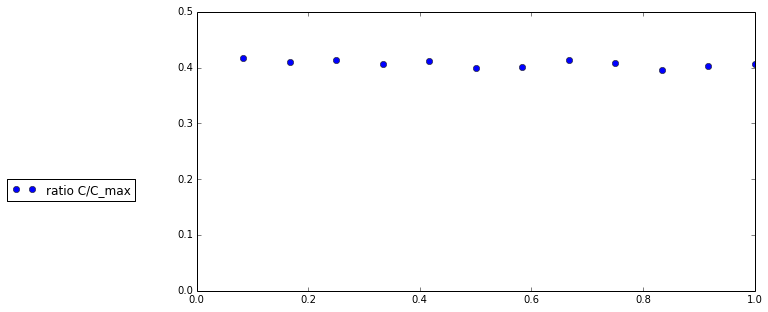

In [159]:
plt.figure(figsize=(10,5))
for c in data :
    if c != "D" : 
        l, = plt.plot(data["D"], data[c], 'o', label=c)
plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)
plt.ylim((0,0.5))
plt.show()

As expected, the concentration at equilibrium does not depend on the value of the diffusion parameter $D$

# Experiment 4

Variation of the equlibrium concentration as a function of $\rho$

In [160]:
data = pd.read_csv("./experiment4.csv", sep="\t") 
data.head()

,ro,ratio C/C_max
0,0.02,0.411946
1,0.04,0.407131
2,0.06,0.425030
3,0.08,0.430766
4,0.10,0.439263


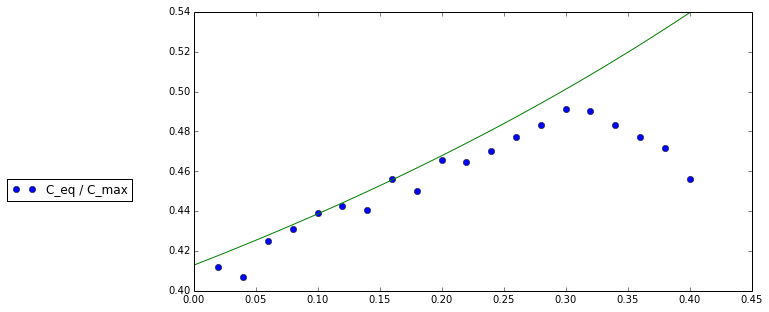

In [164]:
plt.figure(figsize=(10,5))
plt.plot(data["ro"], data["ratio C/C_max"], 'o', label='C_eq / C_max')


def expected_nc(ro) : 
    na = 100 * 36
    nb = 4500 * 36 
    w = 800 * 6
    pon = 0.1
    poff = 0.001
    S = w**2 * (1-ro)
    a0 = na / S
    b0 = nb / S
    c_eq = pon * a0 * b0 /(poff + b0 * pon) 
    nc_eq = c_eq * S
    #kd = na*nb / nc_eq - nb
    return nc_eq / na


plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)
ro_values = [i/100 for i in range(41)]
plt.plot(ro_values, [expected_nc(ro) for ro in ro_values])

plt.show()

The green line is the expected value that we would expect by only taking into account the reduction of the total volume due to the presence of the obstacles. Indeed, by adding obstacles, the total volume accessible by the particles is reduced, which artificially increases the concentration of the particles. This tends to contribute to the production of $C$. We can see that this expected curve describes well the data for small values of $\rho$, but another phenomenon appears we we get close to the percolation threshold.

# Experiment 5

Equilibrium concentration of $C$ as a function of $D_1$, the diffusion coefficient in the patch area

In [248]:
data = pd.read_csv("./experiment5.csv", sep="\t") 
data.tail()

,D1/D0,ratio C/C_max
7,0.666667,0.434858
8,0.750000,0.405522
9,0.833333,0.402763
10,0.916667,0.409937
11,1.000000,0.400172


Attempt to model the concentration at equilibrium in $C$ for the simulation without obstacle and with a patch. Does not seem to fit the data. Didn't manage to reproduce the experimental results of the article, there might be a bug somewhere in the simulations.


Computation of the expected value for the ratio $C/C_{max}$. We suppose again that the total number of $B$ is constant. So we have the equations :
\begin{align*} \varphi  [B_{patch}] + (1 - \varphi)  [B_{ext}] = [B_0] \\ 
\frac{[B_{patch}]}{[B_{ext}]} = \frac{D_{patch}}{D_{ext}}\end{align*}

This gives $$ [B_{patch}] = \frac{[B_0]}{\varphi + (1- \varphi) \frac{D_1}{D_0}}$$

Plus, we have the equilibrium condition : 
$$ p_{on} [A] [B] - p_{off} [C] = 0$$
For $A$, we have the equations
\begin{align*}
\varphi * [B_{patch}] + (1 - \varphi) * [B_{ext}] = [A_0] - [C_eq] \\
\end{algin*}

Doing some computations, we get :

$$ [C]_{eq} = \frac{\beta [A]_0}{1 + \beta}$$
with $\beta = \frac{p_{on}}{p_{off}} [B_{patch}]_{eq}$

In [249]:
def expected_value(D1,phi) :  
    cb0 = 4500 / (800*800)
    pon = 0.1
    poff = 0.001
    
    cb_patch = cb0 /(phi + (1-phi) * D1)
    beta = pon / poff * cb_patch
    return beta/(1 + beta)

def expected_value2(D0, phi) :
    pon = 0.1
    poff = 0.001
    
    S = 800. ** 2
    a0 = 100
    b0 = 4500
    pon0 = pon / phi / S
    pon1 = pon / (1-phi) / S
    
    D0_frac_D1 = D0 * (1-phi) / phi
    
    beta0 = pon0 * b0 / poff / (1 + D0_frac_D1)
    beta1 = pon1 * b0 / poff / (1 + 1/D0_frac_D1)
    
    C_eq0 = a0 /(1 + D0_frac_D1) / (1+1/beta0)
    C_eq1 = a0 /(1 + 1/D0_frac_D1)/(1+1/beta1)
    
    
    return (C_eq0 + C_eq1) / a0

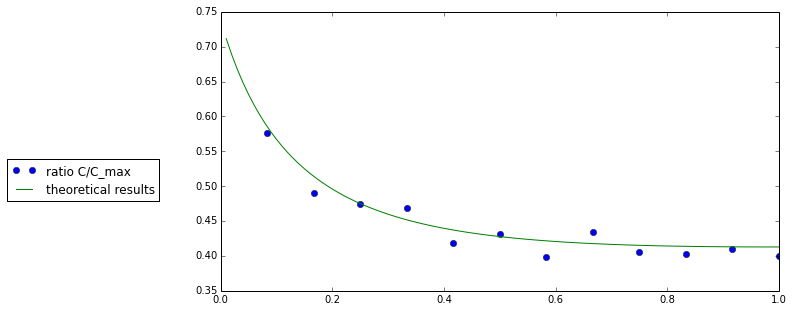

In [250]:
plt.figure(figsize=(10,5))
for c in data :
    if c != "D1/D0" : 
        l, = plt.plot(data["D1/D0"], data[c], 'o', label=c)
D_range = [i/100. for i in range(1,101)]
plt.plot(D_range, [expected_value2(D1, 0.25) for D1 in D_range], label='theoretical results')
plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)
plt.show()

# Experiment 6

Equilibrium concentration of $C$ as a function of $\varphi$, the area of the patch

In [246]:
data = pd.read_csv("./experiment6.csv", sep="\t") 
data.tail()

,phi,ratio C/C_max
7,0.666667,0.488377
8,0.750000,0.478402
9,0.833333,0.444056
10,0.916667,0.409232
11,1.000000,0.417182


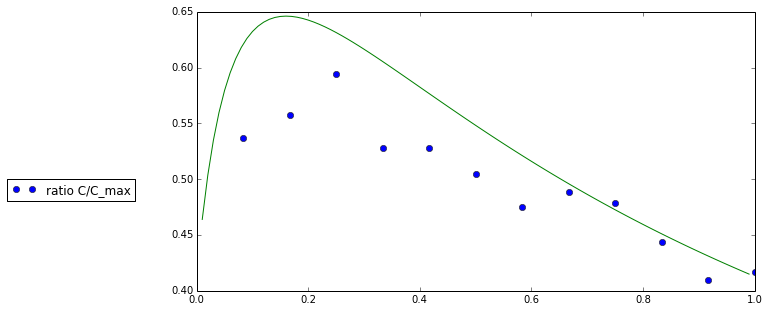

In [247]:
plt.figure(figsize=(10,5))
for c in data :
    if c != "phi" : 
        l, = plt.plot(data["phi"], data[c], 'o', label=c)
plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)

phi_range = [i/100 for i in range(1,100)]
plt.plot(phi_range, [expected_value2(0.05, phi) for phi in phi_range])
plt.show()

Again, these results suggest that there is a bug in the experiments.

# Experiment 7

Time evolution of concentration of $C$ for several values of $\varphi$

In [214]:
data = pd.read_csv("./experiment7.csv", sep="\t") 
data.tail()

,nb_step,phi=0.2,phi=0.7
4995,4995,0.405278,0.411667
4996,4996,0.405278,0.411944
4997,4997,0.404722,0.411667
4998,4998,0.405000,0.411389
4999,4999,0.405278,0.412222


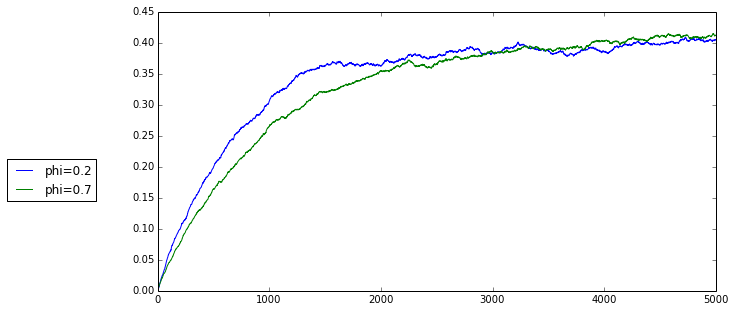

In [215]:
plt.figure(figsize=(10,5))
for c in data :
    if c != "nb_step" : 
        plt.plot(data["nb_step"], data[c], label=c)
plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)
plt.show()

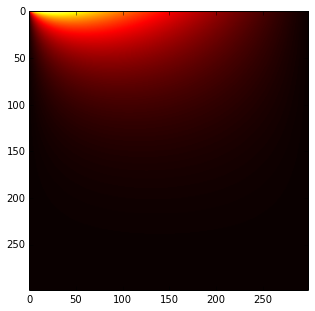

In [222]:
plt.figure(figsize=(10,5))
phi_values = [i/300 for i in range(1,300)]
D0_values = [i/300 for i in range(1,300)]

plt.imshow([[expected_value2(D0, phi) for phi in phi_values] for D0 in D0_values], cmap='hot')

In [221]:
plt.colormaps?

# Experiment 8

In [224]:
data = pd.read_csv("./experiment8.csv", sep="\t") 
data.tail()

,nb_step,phi=0.2,phi=0.7
4995,4995,0.4085,0.4285
4996,4996,0.4085,0.4285
4997,4997,0.4080,0.4280
4998,4998,0.4085,0.4285
4999,4999,0.4075,0.4290


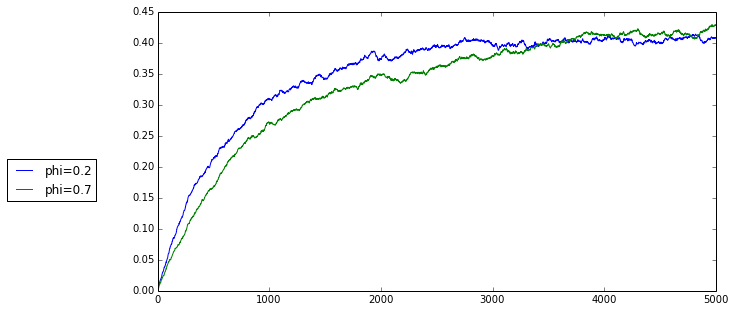

In [225]:
plt.figure(figsize=(10,5))
for c in data :
    if c != "nb_step" : 
        plt.plot(data["nb_step"], data[c], label=c)
plt.legend(bbox_to_anchor=(-0.1,0.3),  loc = 4)
plt.show()